<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/uwu/PropertyListingsInKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Property Listing In Kuala Lumpur** <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nur Izzah Mardhiah binti Rashidi A20EC0116
2. Radin Dafina binti Radin Zulkar Nain A20EC0135

# **Downloading the Dataset**

The chosen dataset is a tabular output of a search for properties for sale in Kuala Lumpur, Malaysia, from a real estate listing website.

Download the dataset from [Kaggle](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur).

Unzip the file. The folder contains an Excel file, where the dataset is.

Upload the Excel file into Google Drive. 


To use the dataset, we mount the Google Drive to Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To read the dataset, we assign a variable named 'dataset' to the path of the file in Google Drive. 

In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Assignment 1/Property_Listings_KL.csv'



---



# **Data Preparation and Cleaning**

To aid us in cleaning the data, we import Pandas and Numpy library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data  = pd.read_csv(dataset)

We load the dataset into a Pandas Data Frame

In [ ]:
df = pd.DataFrame(data)
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


We explore the dataset information including the number of rows and columns and its metadata.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB




---



## **Trim unnecessary string**

Standardize strings into lowercase

In [ ]:
df["Location"] = df["Location"].str.lower()

Trim 'Kuala Lumpur' in Location column

In [ ]:
df['Location'] = df['Location'].str.replace(r', ', '')
df['Location'] = df['Location'].str.replace(r'kuala lumpur', '')

*   Trim 'RM' in Price column
*   Remove commas in Price column
*   Strip whitespace in Price column

In [ ]:
df['Price'] = df['Price'].str.replace(r'RM', '')
df['Price'] = df['Price'].str.replace(r',', '')
df['Price'].str.strip()

0        1250000
1        6800000
2        1030000
3            NaN
4         900000
          ...   
53878    5100000
53879    5000000
53880    5500000
53881     480000
53882     540000
Name: Price, Length: 53883, dtype: object

Remove unit 'sq. ft.' in Size column

In [ ]:
df['Size'] = df['Size'].str.replace(r'sq. ft.', '')
df['Size'] = df['Size'].str.replace(r',', '')

<ipython-input-207-efa4dadab89b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Size'] = df['Size'].str.replace(r'sq. ft.', '')


In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,klcc,1250000,2+1,3.0,2.0,Serviced Residence,Built-up : 1335,Fully Furnished
1,damansara heights,6800000,6,7.0,NaN,Bungalow,Land area : 6900,Partly Furnished
2,dutamas,1030000,3,4.0,2.0,Condominium (Corner),Built-up : 1875,Partly Furnished
3,cheras,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bukit jalil,900000,4+1,3.0,2.0,Condominium (Corner),Built-up : 1513,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,bangsar,5100000,5+1,4.0,NaN,Bungalow (Corner),Land area : 7168,Fully Furnished
53879,bangsar,5000000,5,4.0,NaN,Bungalow (Intermediate),Land area : 15000,Unfurnished
53880,bangsar,5500000,5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168,Partly Furnished
53881,wangsa maju,480000,3,2.0,NaN,Condominium (Intermediate),Built-up : 1150,Unfurnished


## **Parsing column values**

The Rooms column displays the number of listed rooms. The format N+M indicates N full bedrooms and M additional rooms that cannot count as such. Therefore, we separate the value of N bedrooms and M additional rooms into 2 columns.

In [ ]:
df[['Rooms','Additional Room']] = df['Rooms'].str.split('+', expand=True)

The properties can be divided into Built-up and Land-area categories, which the information is in the Size column, together with the numerical size data. Therefore, we separate the categories into another column, Size_2

In [ ]:
df[['Size_2','Size']] = df['Size'].str.split(':', expand=True)

There are certain property type that provide more detailed specification of the property which enclosed in bracket under the Property Type column. This makes the Property Type is a very long list. Hence, we separate this detail information from the general category.

This can be done by splitting the string by '(' as the delimiter

In [ ]:
pd.unique(df['Property Type'])

array(['Serviced Residence', 'Bungalow', 'Condominium (Corner)', nan,
       'Semi-detached House', '2-sty Terrace/Link House (EndLot)',
       'Apartment (Intermediate)',
       '2-sty Terrace/Link House (Intermediate)',
       'Bungalow (Intermediate)', 'Semi-detached House (Intermediate)',
       'Bungalow (Corner)', 'Serviced Residence (Intermediate)',
       'Condominium', '3-sty Terrace/Link House (Intermediate)',
       'Condominium (Intermediate)', 'Condominium (EndLot)',
       'Serviced Residence (Corner)', 'Serviced Residence (Duplex)',
       '2-sty Terrace/Link House', '2-sty Terrace/Link House (Corner)',
       '2.5-sty Terrace/Link House (Intermediate)',
       '3-sty Terrace/Link House (Corner)',
       '3-sty Terrace/Link House (EndLot)',
       '3.5-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Penthouse)', 'Condominium (Studio)',
       '1-sty Terrace/Link House (Intermediate)',
       '1.5-sty Terrace/Link House (EndLot)', 'Apartment',
       '

In [ ]:
df[['Property Type','Property Type_2']] = df['Property Type'].str.split('(', expand=True)

In [ ]:
df['Property Type_2'] = df['Property Type_2'].str.replace(r')', '')

<ipython-input-213-e144801c2687>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Property Type_2'] = df['Property Type_2'].str.replace(r')', '')


The result from splitting the category leaves some afftected data with whitespace at the end of the string. Therefore, we strip the whitespace to make sure there is no duplication of data

In [ ]:
pd.unique(df['Property Type']) #before strip - duplication of data exist

array(['Serviced Residence', 'Bungalow', 'Condominium ', nan,
       'Semi-detached House', '2-sty Terrace/Link House ', 'Apartment ',
       'Bungalow ', 'Semi-detached House ', 'Serviced Residence ',
       'Condominium', '3-sty Terrace/Link House ',
       '2-sty Terrace/Link House', '2.5-sty Terrace/Link House ',
       '3.5-sty Terrace/Link House ', '1-sty Terrace/Link House ',
       '1.5-sty Terrace/Link House ', 'Apartment',
       '4-sty Terrace/Link House', '4-sty Terrace/Link House ',
       'Townhouse', 'Townhouse ', '3-sty Terrace/Link House',
       'Residential Land', '2.5-sty Terrace/Link House',
       '4.5-sty Terrace/Link House ', '3.5-sty Terrace/Link House',
       '1-sty Terrace/Link House', 'Residential Land ', 'Bungalow Land',
       'Flat ', 'Bungalow Land ', '1.5-sty Terrace/Link House', 'Flat',
       'Cluster House ', '4.5-sty Terrace/Link House', 'Cluster House'],
      dtype=object)

In [ ]:
df['Property Type'] = df['Property Type'].str.strip()

In [ ]:
pd.unique(df['Property Type']) #after strip - duplication of data no longer exist

array(['Serviced Residence', 'Bungalow', 'Condominium', nan,
       'Semi-detached House', '2-sty Terrace/Link House', 'Apartment',
       '3-sty Terrace/Link House', '2.5-sty Terrace/Link House',
       '3.5-sty Terrace/Link House', '1-sty Terrace/Link House',
       '1.5-sty Terrace/Link House', '4-sty Terrace/Link House',
       'Townhouse', 'Residential Land', '4.5-sty Terrace/Link House',
       'Bungalow Land', 'Flat', 'Cluster House'], dtype=object)

In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Additional Room,Size_2,Property Type_2
0,klcc,1250000,2,3.0,2.0,Serviced Residence,1335,Fully Furnished,1,Built-up,None
1,damansara heights,6800000,6,7.0,NaN,Bungalow,6900,Partly Furnished,None,Land area,None
2,dutamas,1030000,3,4.0,2.0,Condominium,1875,Partly Furnished,None,Built-up,Corner
3,cheras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bukit jalil,900000,4,3.0,2.0,Condominium,1513,Partly Furnished,1,Built-up,Corner
...,...,...,...,...,...,...,...,...,...,...,...
53878,bangsar,5100000,5,4.0,NaN,Bungalow,7168,Fully Furnished,1,Land area,Corner
53879,bangsar,5000000,5,4.0,NaN,Bungalow,15000,Unfurnished,None,Land area,Intermediate
53880,bangsar,5500000,5,4.0,NaN,Bungalow,7168,Partly Furnished,1,Land area,Intermediate
53881,wangsa maju,480000,3,2.0,NaN,Condominium,1150,Unfurnished,None,Built-up,Intermediate


## **Fill null value with zero**

Since there zero value is valid for Additional Room column, instead of null and empty, we replace them with zero.

In [ ]:
df.loc[df['Additional Room'].isnull(), 'Additional Room'] = '0'
df['Additional Room'] = df['Additional Room'].replace([''], '0')

Property type is also valid without null value, therefore we standardize it by replacing it with None value instead.

In [ ]:
df.loc[df['Property Type_2'].isnull(), 'Property Type_2'] = None
df['Additional Room'] = df['Additional Room'].replace([''], None)

## **Remove rows with null and invalid value**



Drop rows with null value

In [ ]:
df.dropna(inplace=True)

Drop rows with size value of 0.0. This considered as invalid value

In [ ]:
indexSize = df[ (df['Size'] == 0.0)].index
df.drop(indexSize , inplace=True)

In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Additional Room,Size_2,Property Type_2
2,dutamas,1030000,3,4.0,2.0,Condominium,1875,Partly Furnished,0,Built-up,Corner
4,bukit jalil,900000,4,3.0,2.0,Condominium,1513,Partly Furnished,1,Built-up,Corner
8,taman tun dr ismail,1950000,4,4.0,3.0,2-sty Terrace/Link House,25x75,Partly Furnished,1,Land area,EndLot
9,sri petaling,385000,3,2.0,1.0,Apartment,904,Partly Furnished,0,Built-up,Intermediate
13,taman tun dr ismail,4580000,6,5.0,5.0,Bungalow,6000,Partly Furnished,1,Land area,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...
53859,kuchai lama,300000,3,2.0,1.0,Serviced Residence,820,Unfurnished,0,Built-up,Intermediate
53868,kl sentral,1400000,3,3.0,2.0,Condominium,1544,Fully Furnished,1,Land area,Corner
53869,kl eco city,880000,1,1.0,1.0,Condominium,650,Partly Furnished,0,Built-up,Corner
53876,sri hartamas,2700000,4,6.0,3.0,Condominium,3973,Partly Furnished,2,Built-up,Corner


## **Reset Index**

We then reset the dataframe index to make it look appropriate

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Additional Room,Size_2,Property Type_2
0,dutamas,1030000,3,4.0,2.0,Condominium,1875,Partly Furnished,0,Built-up,Corner
1,bukit jalil,900000,4,3.0,2.0,Condominium,1513,Partly Furnished,1,Built-up,Corner
2,taman tun dr ismail,1950000,4,4.0,3.0,2-sty Terrace/Link House,25x75,Partly Furnished,1,Land area,EndLot
3,sri petaling,385000,3,2.0,1.0,Apartment,904,Partly Furnished,0,Built-up,Intermediate
4,taman tun dr ismail,4580000,6,5.0,5.0,Bungalow,6000,Partly Furnished,1,Land area,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...
19283,kuchai lama,300000,3,2.0,1.0,Serviced Residence,820,Unfurnished,0,Built-up,Intermediate
19284,kl sentral,1400000,3,3.0,2.0,Condominium,1544,Fully Furnished,1,Land area,Corner
19285,kl eco city,880000,1,1.0,1.0,Condominium,650,Partly Furnished,0,Built-up,Corner
19286,sri hartamas,2700000,4,6.0,3.0,Condominium,3973,Partly Furnished,2,Built-up,Corner


## **Replace with appropriate value**

In [ ]:
pd.unique(df['Rooms']) #before replace

array(['3', '4', '6', '1', '2', '5', 'Studio', '7', '12', '8', '13',
       '20 Above', '10', '9', '15', '11', '14', '16'], dtype=object)

Since Rooms column should have only numerical value, we replace the 'Studio' and '20 above' with numbers, which is 1 and 20 respectively.

In [ ]:
df['Rooms'] = df['Rooms'].replace(['Studio'], '1')
df['Rooms'] = df['Rooms'].replace(['20 Above'], '20')

In [ ]:
pd.unique(df['Rooms']) #after replace

array(['3', '4', '6', '1', '2', '5', '7', '12', '8', '13', '20', '10',
       '9', '15', '11', '14', '16'], dtype=object)

## **Change to appropriate data types**

There are some columns (Price, Rooms, Size, Additional Room) which supposed to store numerical data types. Hence, we cast the object datatype into float and int datatype.

In [ ]:
df.dtypes

Location            object
Price               object
Rooms               object
Bathrooms          float64
Car Parks          float64
Property Type       object
Size                object
Furnishing          object
Additional Room     object
Size_2              object
Property Type_2     object
dtype: object

In [ ]:
df['Price'] = df['Price'].astype(float)
df[['Bathrooms','Car Parks','Rooms','Additional Room']] = df[['Bathrooms', 'Car Parks','Rooms','Additional Room']].astype(int)

There are some rows with data Size that is not in its final calculation. For example, 25x75 value. These kind of values are too many for us to calculate and reassign manually. Therefore, we dismiss these uncovertable rows.

In [ ]:
pd.unique(df['Size'])

array([' 1875 ', ' 1513 ', ' 25x75 ', ..., ' 6050 ', ' 32 x 85 ',
       ' 2132 '], dtype=object)

In [ ]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df = df[df['Size'].notna()].astype({'Size': float})

In [ ]:
df.dtypes #final data types

Location            object
Price              float64
Rooms                int64
Bathrooms            int64
Car Parks            int64
Property Type       object
Size               float64
Furnishing          object
Additional Room      int64
Size_2              object
Property Type_2     object
dtype: object

## **Reorder columns**


Reordering the columns make the dataframes looks neat and proper because the related columns are side by side.

In [ ]:
df = df.reindex(columns=['Location','Price','Size','Rooms','Additional Room','Bathrooms','Car Parks', 'Property Type', 'Property Type_2', 'Size_2','Furnishing'])

In [ ]:
display(df)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
0,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished
1,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished
3,sri petaling,385000.0,904.0,3,0,2,1,Apartment,Intermediate,Built-up,Partly Furnished
4,taman tun dr ismail,4580000.0,6000.0,6,1,5,5,Bungalow,Intermediate,Land area,Partly Furnished
5,bukit tunku (kenny hills),9000000.0,8500.0,6,1,7,4,Bungalow,Corner,Land area,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
19283,kuchai lama,300000.0,820.0,3,0,2,1,Serviced Residence,Intermediate,Built-up,Unfurnished
19284,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished
19285,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished
19286,sri hartamas,2700000.0,3973.0,4,2,6,3,Condominium,Corner,Built-up,Partly Furnished


# **Exploratory Analysis and Visualization**



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Compute the mean, sum, range

In [ ]:
df.describe()

,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks
count,1.704300e+04,17043.000000,17043.000000,17043.000000,17043.000000,17043.000000
mean,1.621916e+06,2216.017303,3.105498,0.443643,2.933521,2.000704
std,2.213853e+06,7660.497674,1.203219,0.557703,1.554315,1.348934
min,6.500000e+02,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.300000e+05,1001.500000,3.000000,0.000000,2.000000,1.000000
50%,8.600000e+05,1303.000000,3.000000,0.000000,2.000000,2.000000
75%,1.769000e+06,2094.000000,4.000000,1.000000,4.000000,2.000000
max,5.128101e+07,690000.000000,20.000000,2.000000,20.000000,30.000000


## **Number of properties per Location** 

Text(0.5, 0.98, 'Count of Properties Per Location')

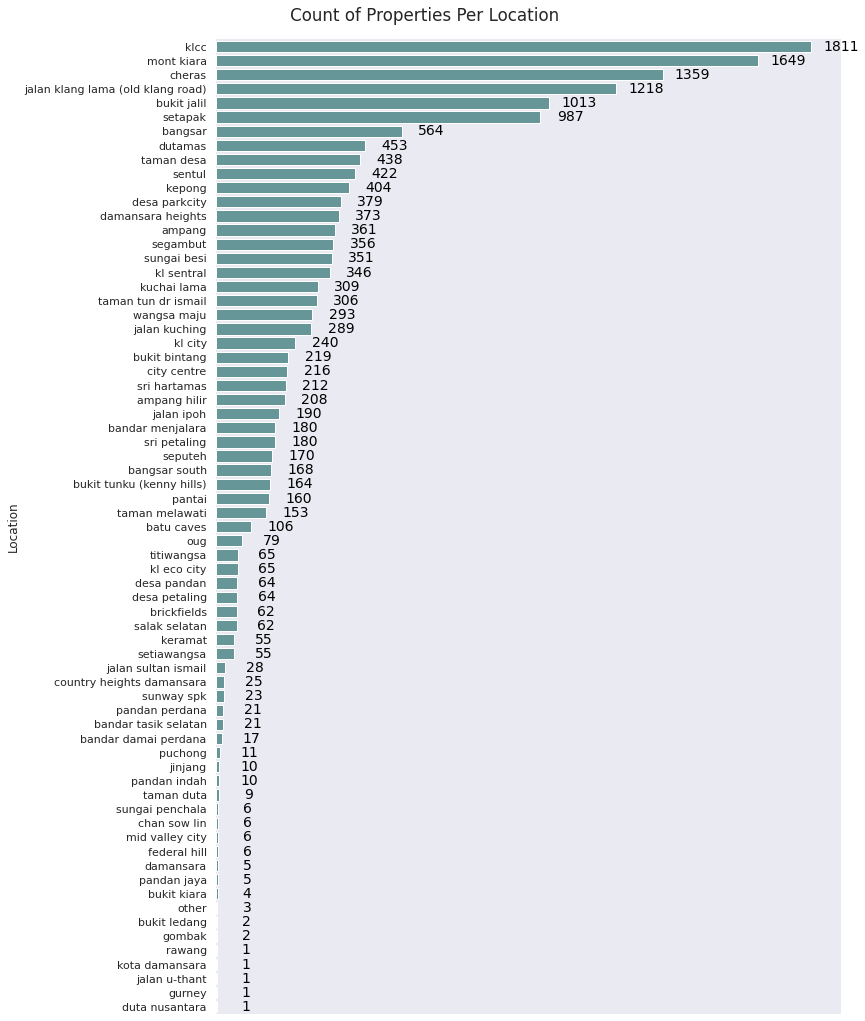

In [ ]:
df1 = df.groupby("Location").size().sort_values(ascending=False).reset_index()
shift = 0.05 * (df1[0].max() - df1[0].min())
df_sizes = df1.groupby("Location").size()[df1["Location"]]

fig = sns.catplot(
    data=df1, x=0, y="Location", kind="bar", 
    color="cadetblue", height=15, aspect=0.8)

for index, row in df1.iterrows():
    fig.ax.text(
        row[0] + shift, row.name, row[0], 
        color='black', ha="center", va="center")

fig.ax.get_xaxis().set_visible(False);
fig.despine(left=True, bottom=True)
fig.set_xlabels("No of properties");
fig.fig.subplots_adjust(top=0.95)
fig.fig.suptitle('Count of Properties Per Location')

## **Mean Price Based on Location**

In [ ]:
df_prices = df.groupby('Location').agg([np.mean, np.std])
display(df_prices)

Price                        Size                \
                              mean           std          mean           std   
Location                                                                       
ampang                1.569690e+06  2.107984e+06   2342.515235   2527.876851   
ampang hilir          3.662327e+06  4.585701e+06   3619.269231   3678.250676   
bandar damai perdana  6.745871e+05  3.008017e+05   1519.294118    848.434276   
bandar menjalara      5.746424e+05  3.125154e+05   1991.144444  10638.927344   
bandar tasik selatan  3.837619e+05  2.024813e+05    958.761905    264.041267   
...                            ...           ...           ...           ...   
taman duta            1.177667e+07  7.935373e+06  15962.000000  10439.371808   
taman melawati        2.364218e+06  1.452526e+06   4529.843137   2855.108564   
taman tun dr ismail   2.150789e+06  1.936484e+06   2991.831503   4059.794305   
titiwangsa            1.988552e+06  2.598033e+06   7729.184615  36968.433725   
wangsa maju           7.272844e+05  5.280848e+05   1775.324096   6540.132444   

                         Rooms           Additional Room           Bathrooms  \
                          mean       std            mean       std      mean   
Location                                                                       
ampang                3.047091  1.547578        0.454294  0.541335  3.202216   
ampang hilir          3.307692  1.421552        0.668269  0.606369  3.745192   
bandar damai perdana  3.764706  0.903425        0.235294  0.437237  3.176471   
bandar menjalara      3.138889  0.556966        0.394444  0.490094  2.311111   
bandar tasik selatan  3.095238  0.436436        0.000000  0.000000  2.047619   
...                        ...       ...             ...       ...       ...   
taman duta            5.666667  1.500000        0.666667  0.500000  5.888889   
taman melawati        4.601307  1.314594        0.614379  0.574962  4.947712   
taman tun dr ismail   3.532680  1.298389        0.490196  0.623240  3.330065   
titiwangsa            3.523077  1.480157        0.307692  0.556863  2.892308   
wangsa maju           3.160410  0.938997        0.372014  0.511680  2.593857   

                               Car Parks            
                           std      mean       std  
Location                                            
ampang                1.869520  2.085873  1.416508  
ampang hilir          1.825074  2.692308  2.529352  
bandar damai perdana  1.185079  1.941176  0.555719  
bandar menjalara      0.581742  1.577778  0.896645  
bandar tasik selatan  0.384212  1.285714  0.560612  
...                        ...       ...       ...  
taman duta            1.833333  6.222222  2.166667  
taman melawati        1.966130  3.549020  1.773122  
taman tun dr ismail   1.604975  2.464052  1.768675  
titiwangsa            1.696716  2.200000  2.319752  
wangsa maju           1.138776  1.761092  0.817774  

[69 rows x 12 columns]

In [ ]:
df_prices_mean = df_prices.Price['mean'].sort_values(ascending=True)
display(df_prices_mean)

Location
desa petaling                3.175469e+05
bandar tasik selatan         3.837619e+05
jinjang                      3.877000e+05
pandan jaya                  4.250000e+05
rawang                       4.500000e+05
                                 ...     
federal hill                 6.525000e+06
bukit tunku (kenny hills)    6.582513e+06
jalan u-thant                8.280000e+06
country heights damansara    9.188160e+06
taman duta                   1.177667e+07
Name: mean, Length: 69, dtype: float64

Text(0, 0.5, 'Location')

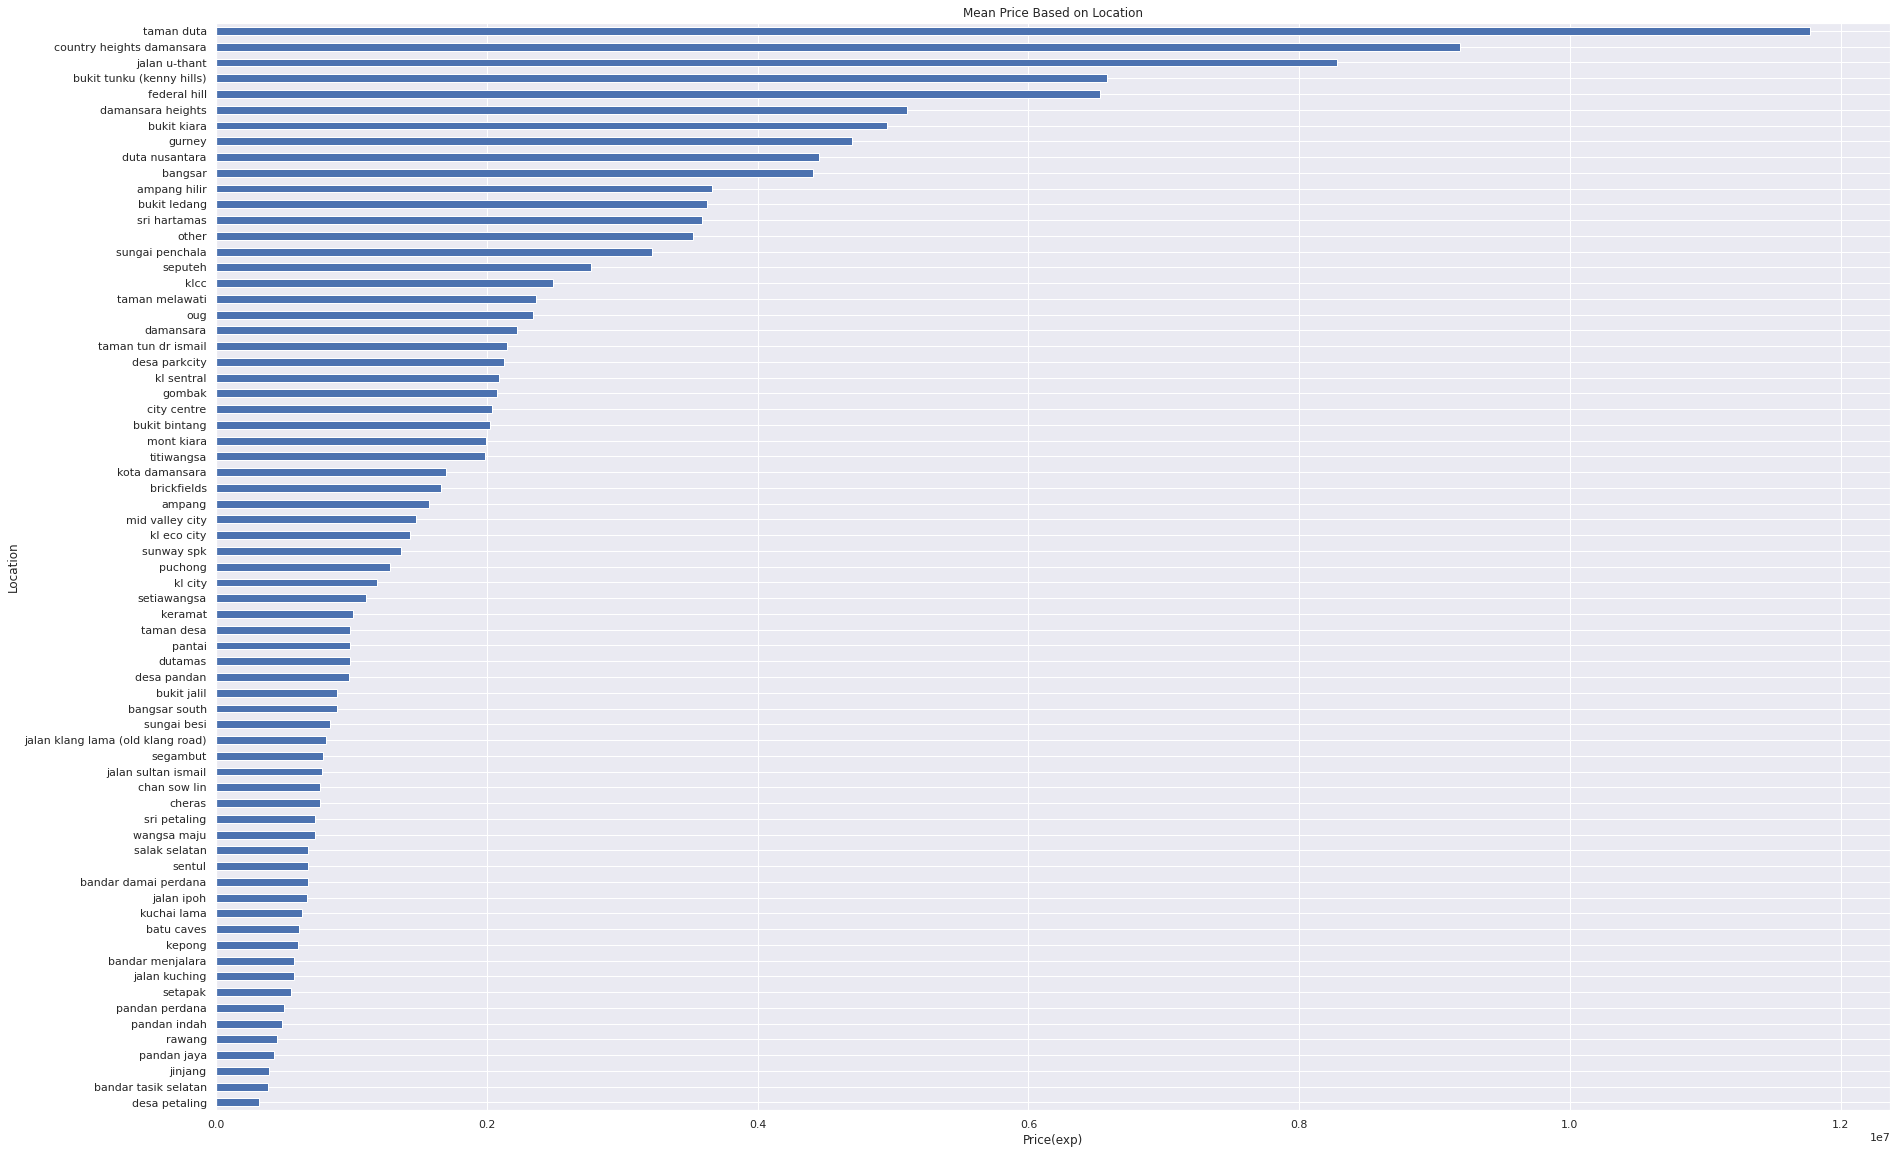

In [ ]:
df_prices_mean.plot(kind="barh",figsize=(30,20),)
plt.title("Mean Price Based on Location")
plt.xlabel("Price(exp)")
plt.ylabel("Location")

A new data frame to store only numerical columns is created

In [ ]:
cols = [1,2,3,4,5,6]
df_numerical = df[df.columns[cols]]
display(df_numerical)

,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks
0,1030000.0,1875.0,3,0,4,2
1,900000.0,1513.0,4,1,3,2
3,385000.0,904.0,3,0,2,1
4,4580000.0,6000.0,6,1,5,5
5,9000000.0,8500.0,6,1,7,4
...,...,...,...,...,...,...
19283,300000.0,820.0,3,0,2,1
19284,1400000.0,1544.0,3,1,3,2
19285,880000.0,650.0,1,0,1,1
19286,2700000.0,3973.0,4,2,6,3


## **Box Plot of Built-up/Land-area**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


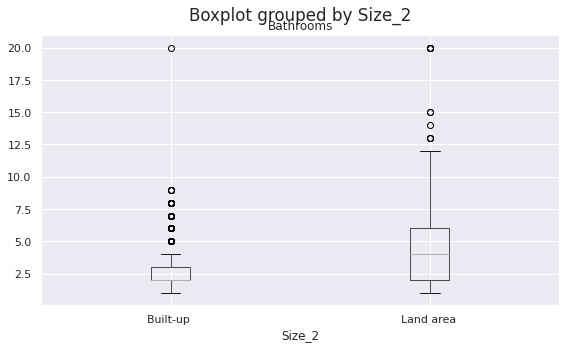

In [ ]:
df.boxplot(by ='Size_2', column =['Bathrooms'])

*Land area properties display longer box plot than built-up which means that land area has more dispersed data. Built-ups has median value near 2.5 bathrooms and some values outlies from 5 to 10 bathrooms.*

*However, for the land area, the median is located slightly higher than built-up which is nearly 5. The maximum value is much higher and less outliers are shown compared to built-ups.*

## **Percentage of Property Rooms**

In [ ]:
pie_chart2 = df_numerical['Rooms'].value_counts()
display(pie_chart2)

3     8612
2     2697
4     2696
1     1330
5     1083
6      404
7      143
8       42
10      13
9       11
13       3
20       3
11       2
12       1
15       1
14       1
16       1
Name: Rooms, dtype: int64

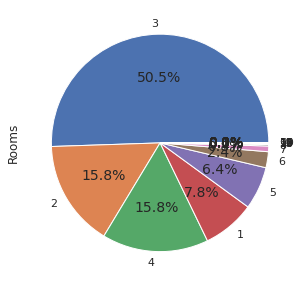

In [ ]:
pie_chart2.plot(kind='pie',autopct="%1.1f%%")

## **Relationship between No. of Rooms and No. of Bathrooms**

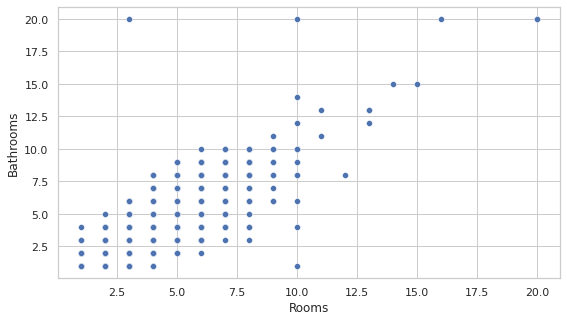

In [ ]:
sns.set(style='whitegrid')
 
sns.scatterplot(x="Rooms",
                    y="Bathrooms",
                    data=df_numerical)

# **Asking and Answering Questions**



In [ ]:
display(df)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
0,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished
1,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished
3,sri petaling,385000.0,904.0,3,0,2,1,Apartment,Intermediate,Built-up,Partly Furnished
4,taman tun dr ismail,4580000.0,6000.0,6,1,5,5,Bungalow,Intermediate,Land area,Partly Furnished
5,bukit tunku (kenny hills),9000000.0,8500.0,6,1,7,4,Bungalow,Corner,Land area,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
19283,kuchai lama,300000.0,820.0,3,0,2,1,Serviced Residence,Intermediate,Built-up,Unfurnished
19284,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished
19285,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished
19286,sri hartamas,2700000.0,3973.0,4,2,6,3,Condominium,Corner,Built-up,Partly Furnished


#### Q1: What type of furnishing it is for most of the property listed? What is the percentage?


In [ ]:
q1 = df['Furnishing'].value_counts()
print(q1)

Partly Furnished    9792
Fully Furnished     5034
Unfurnished         2124
Unknown               93
Name: Furnishing, dtype: int64


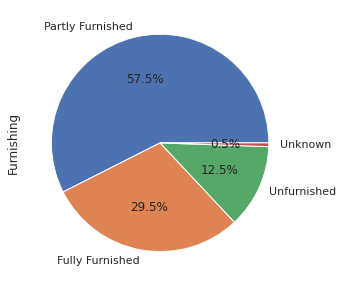

In [ ]:
q1.plot(kind='pie',autopct="%1.1f%%")

*Most of the properties are partly furnished with the percentage of 55.7%*





---




#### Q2: What is the smallest size for a bungalow available on the list?

In [ ]:
smallest_condo = df[df['Property Type'] == 'Bungalow']

In [ ]:
smallest_condo.sort_values(by=['Size'], ascending=True).head(1)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
11197,taman desa,4500000.0,1615.0,5,1,5,4,Bungalow,Corner,Land area,Partly Furnished


*The smallest bungalow available is located at Mont Kiara with the size of 1500 square feet*



---



#### Q3: Does number of rooms influence the rising price of those properties?

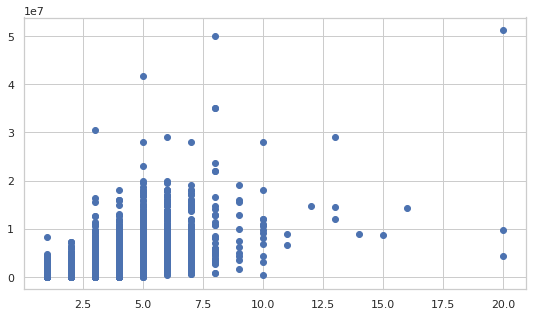

In [ ]:
plt.scatter(df['Rooms'], df['Price'])
plt.show()

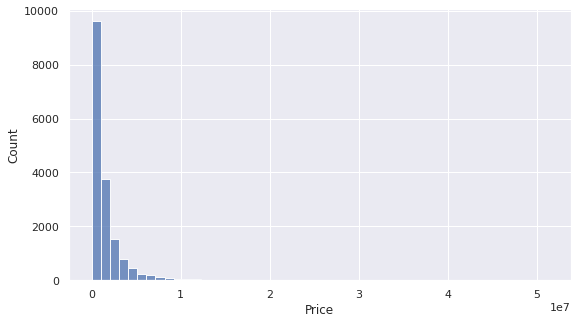

In [ ]:
sns.set(style="darkgrid")
sns

sns.histplot(data=df, x="Price", bins=50)
plt.show()

*As shown in the scatter plot, there is no clear pattern that can be seen. We aware that this is because the price data is skewed. There is more data on cheaper properties than the expensive ones as displayed in the histogram above. Thus, the scatter plot is denser towards the left and bottom part of the graph*

Selecting and focusing on price data that is near to mean value

In [ ]:
price_relevant = df[df['Price'] <= 2000000]
display(price_relevant)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
0,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished
1,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished
3,sri petaling,385000.0,904.0,3,0,2,1,Apartment,Intermediate,Built-up,Partly Furnished
6,mont kiara,1780000.0,1830.0,4,1,4,2,Condominium,Corner,Built-up,Partly Furnished
8,desa parkcity,1500000.0,1798.0,3,2,4,2,Condominium,Corner,Built-up,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
19282,bandar menjalara,525000.0,1157.0,3,0,3,2,2-sty Terrace/Link House,Intermediate,Land area,Partly Furnished
19283,kuchai lama,300000.0,820.0,3,0,2,1,Serviced Residence,Intermediate,Built-up,Unfurnished
19284,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished
19285,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished


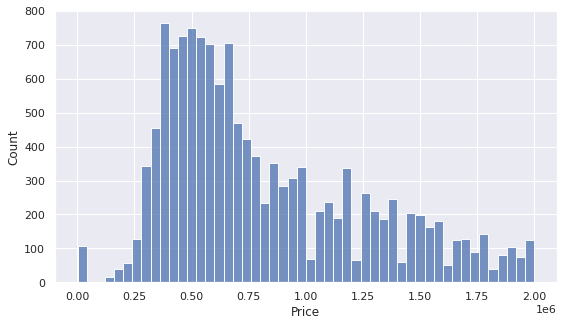

In [ ]:
sns.set(style="darkgrid")
sns

sns.histplot(data=price_relevant, x="Price", bins=50)
plt.show()

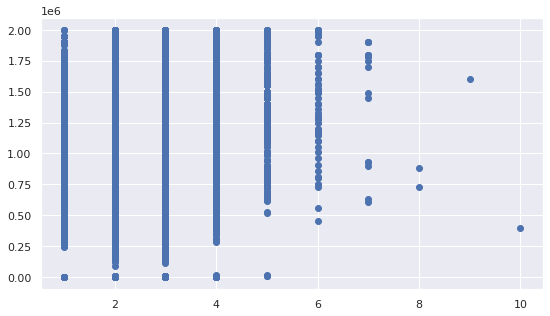

In [ ]:
plt.scatter(price_relevant['Rooms'], price_relevant['Price'])
plt.show()

*The scatter plot shows a slight pattern that displays the more number of rooms, the pricier the properties become.*



---



#### Q4: Does any of built-up type is suitable for a family of 6 (based on the number of rooms)?

In [ ]:
df[(df['Size_2'] =='Built-up ') & (df['Rooms'] >= 6)].sort_values(by=['Rooms'], ascending=True)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
9267,kuchai lama,808000.0,2387.0,6,1,6,2,Condominium,Corner,Built-up,Unfurnished
12677,mont kiara,2960000.0,4550.0,6,1,6,4,Condominium,Duplex,Built-up,Partly Furnished
12650,kuchai lama,1523000.0,2798.0,6,1,6,5,Condominium,Corner,Built-up,Partly Furnished
12638,setapak,1180000.0,3300.0,6,0,4,3,3-sty Terrace/Link House,Intermediate,Built-up,Partly Furnished
12335,klcc,6750000.0,6600.0,6,1,6,5,Condominium,Corner,Built-up,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
8023,cheras,630000.0,3000.0,7,0,5,2,3-sty Terrace/Link House,Intermediate,Built-up,Partly Furnished
16053,bukit tunku (kenny hills),4680000.0,6268.0,8,1,8,4,Condominium,Corner,Built-up,Partly Furnished
3903,setapak,730000.0,2500.0,8,0,3,2,Condominium,Intermediate,Built-up,Partly Furnished
16762,kl city,4300000.0,6000.0,10,0,8,4,Condominium,Corner,Built-up,Fully Furnished


*There is 151 available built-up properties that is suitable for a family with 6 members*



---



#### Q5: Recommend affordable properties for a newly-wed couple which is fine with only 1 bedroom and 1 guest room

In [ ]:
df[(df['Rooms'] == 2)].sort_values(by=['Price'], ascending=True)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
7067,bandar menjalara,1300.0,1076.0,2,1,2,1,Condominium,Intermediate,Built-up,Fully Furnished
12180,setapak,1300.0,1104.0,2,0,2,1,Condominium,Corner,Built-up,Partly Furnished
12916,jalan klang lama (old klang road),1650.0,1000.0,2,1,3,1,Condominium,Corner,Built-up,Partly Furnished
11414,taman desa,1800.0,715.0,2,0,2,1,Serviced Residence,Intermediate,Built-up,Partly Furnished
9063,jalan klang lama (old klang road),1800.0,1200.0,2,1,2,1,Serviced Residence,Intermediate,Built-up,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
14316,klcc,6200000.0,1722.0,2,1,2,2,Condominium,Corner,Built-up,Fully Furnished
14317,klcc,6500000.0,1830.0,2,1,2,2,Condominium,Corner,Built-up,Fully Furnished
4108,bukit jalil,7200000.0,868.0,2,0,2,1,Serviced Residence,Corner,Built-up,Partly Furnished
11389,kl sentral,7224000.0,2408.0,2,1,4,2,Serviced Residence,Corner,Built-up,Partly Furnished


*There are various selection of properties that is suitable for 2 persons with price as low as RM1300*

# **Inferences and Conclusion**

1.   We could see that most properties which is marketed in this website is located at KLCC through the [bar graph](#scrollTo=c7fugjWzVJJ7&line=1&uniqifier=1). There are several possible reasons from this including too expensive price that people could not afford or people do not prefer to stay at the center of the city or the properties built are exceeding the population.

2.   However, we do not think that too high price is the main factor for this to happen. This is because if we observe the [bar graph](#scrollTo=Pe-MGcHYoy8w&line=2&uniqifier=1) that shows mean price based on location, properties in Taman Duta will be most expensive, yet Taman Duta is not among the highest number of properties marketed in this website.

3. Hence, we conclude that there is much more factor influencing the number of properties based on the location in this website. Clearly, not just because of the price. 



> **Property price does not mainly influence the number of properties being marketed in a location.**



---




1.   Next, to compare, land area properties display longer [box plot](#scrollTo=HHUZNaTrQxFE&line=1&uniqifier=1) than built-up which means that land area has more dispersed data. Built-ups has median value near 2.5 bathrooms and some values outlies from 5 to 10 bathrooms.
2.   However, for the land area, the median is located slightly higher than built-up which is nearly 5. The maximum value is much higher and less outliers are shown compared to built-ups.



> **Hence, the data is realistic as land area commonly have a bigger space for more bathrooms than built-ups.**




---



> **In general, this dataset is not enough if we would like to determine what exactly influences the market property price.**

























# **References and Future Work**

In the future projects, we would like to search for more dataset and information about the possible factors that affect the property price as well as the reason behind the huge amount of marketed properties in this website. 

References:

1.   [Pandas Guide](https://pandas.pydata.org/docs/user_guide/text.html)
2.   [Data Visualization Guide](https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/)
2.   [Dataset](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur)

